In [93]:
from PIL import Image
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
from Functions.Diff_eqsns import diff_b, diff_b_modified_Euler
from Functions.Diff_eqsns import diff_r, diff_r_modified_Euler

#### Make the root directory
#### Import the images 
#### Implement the methods 


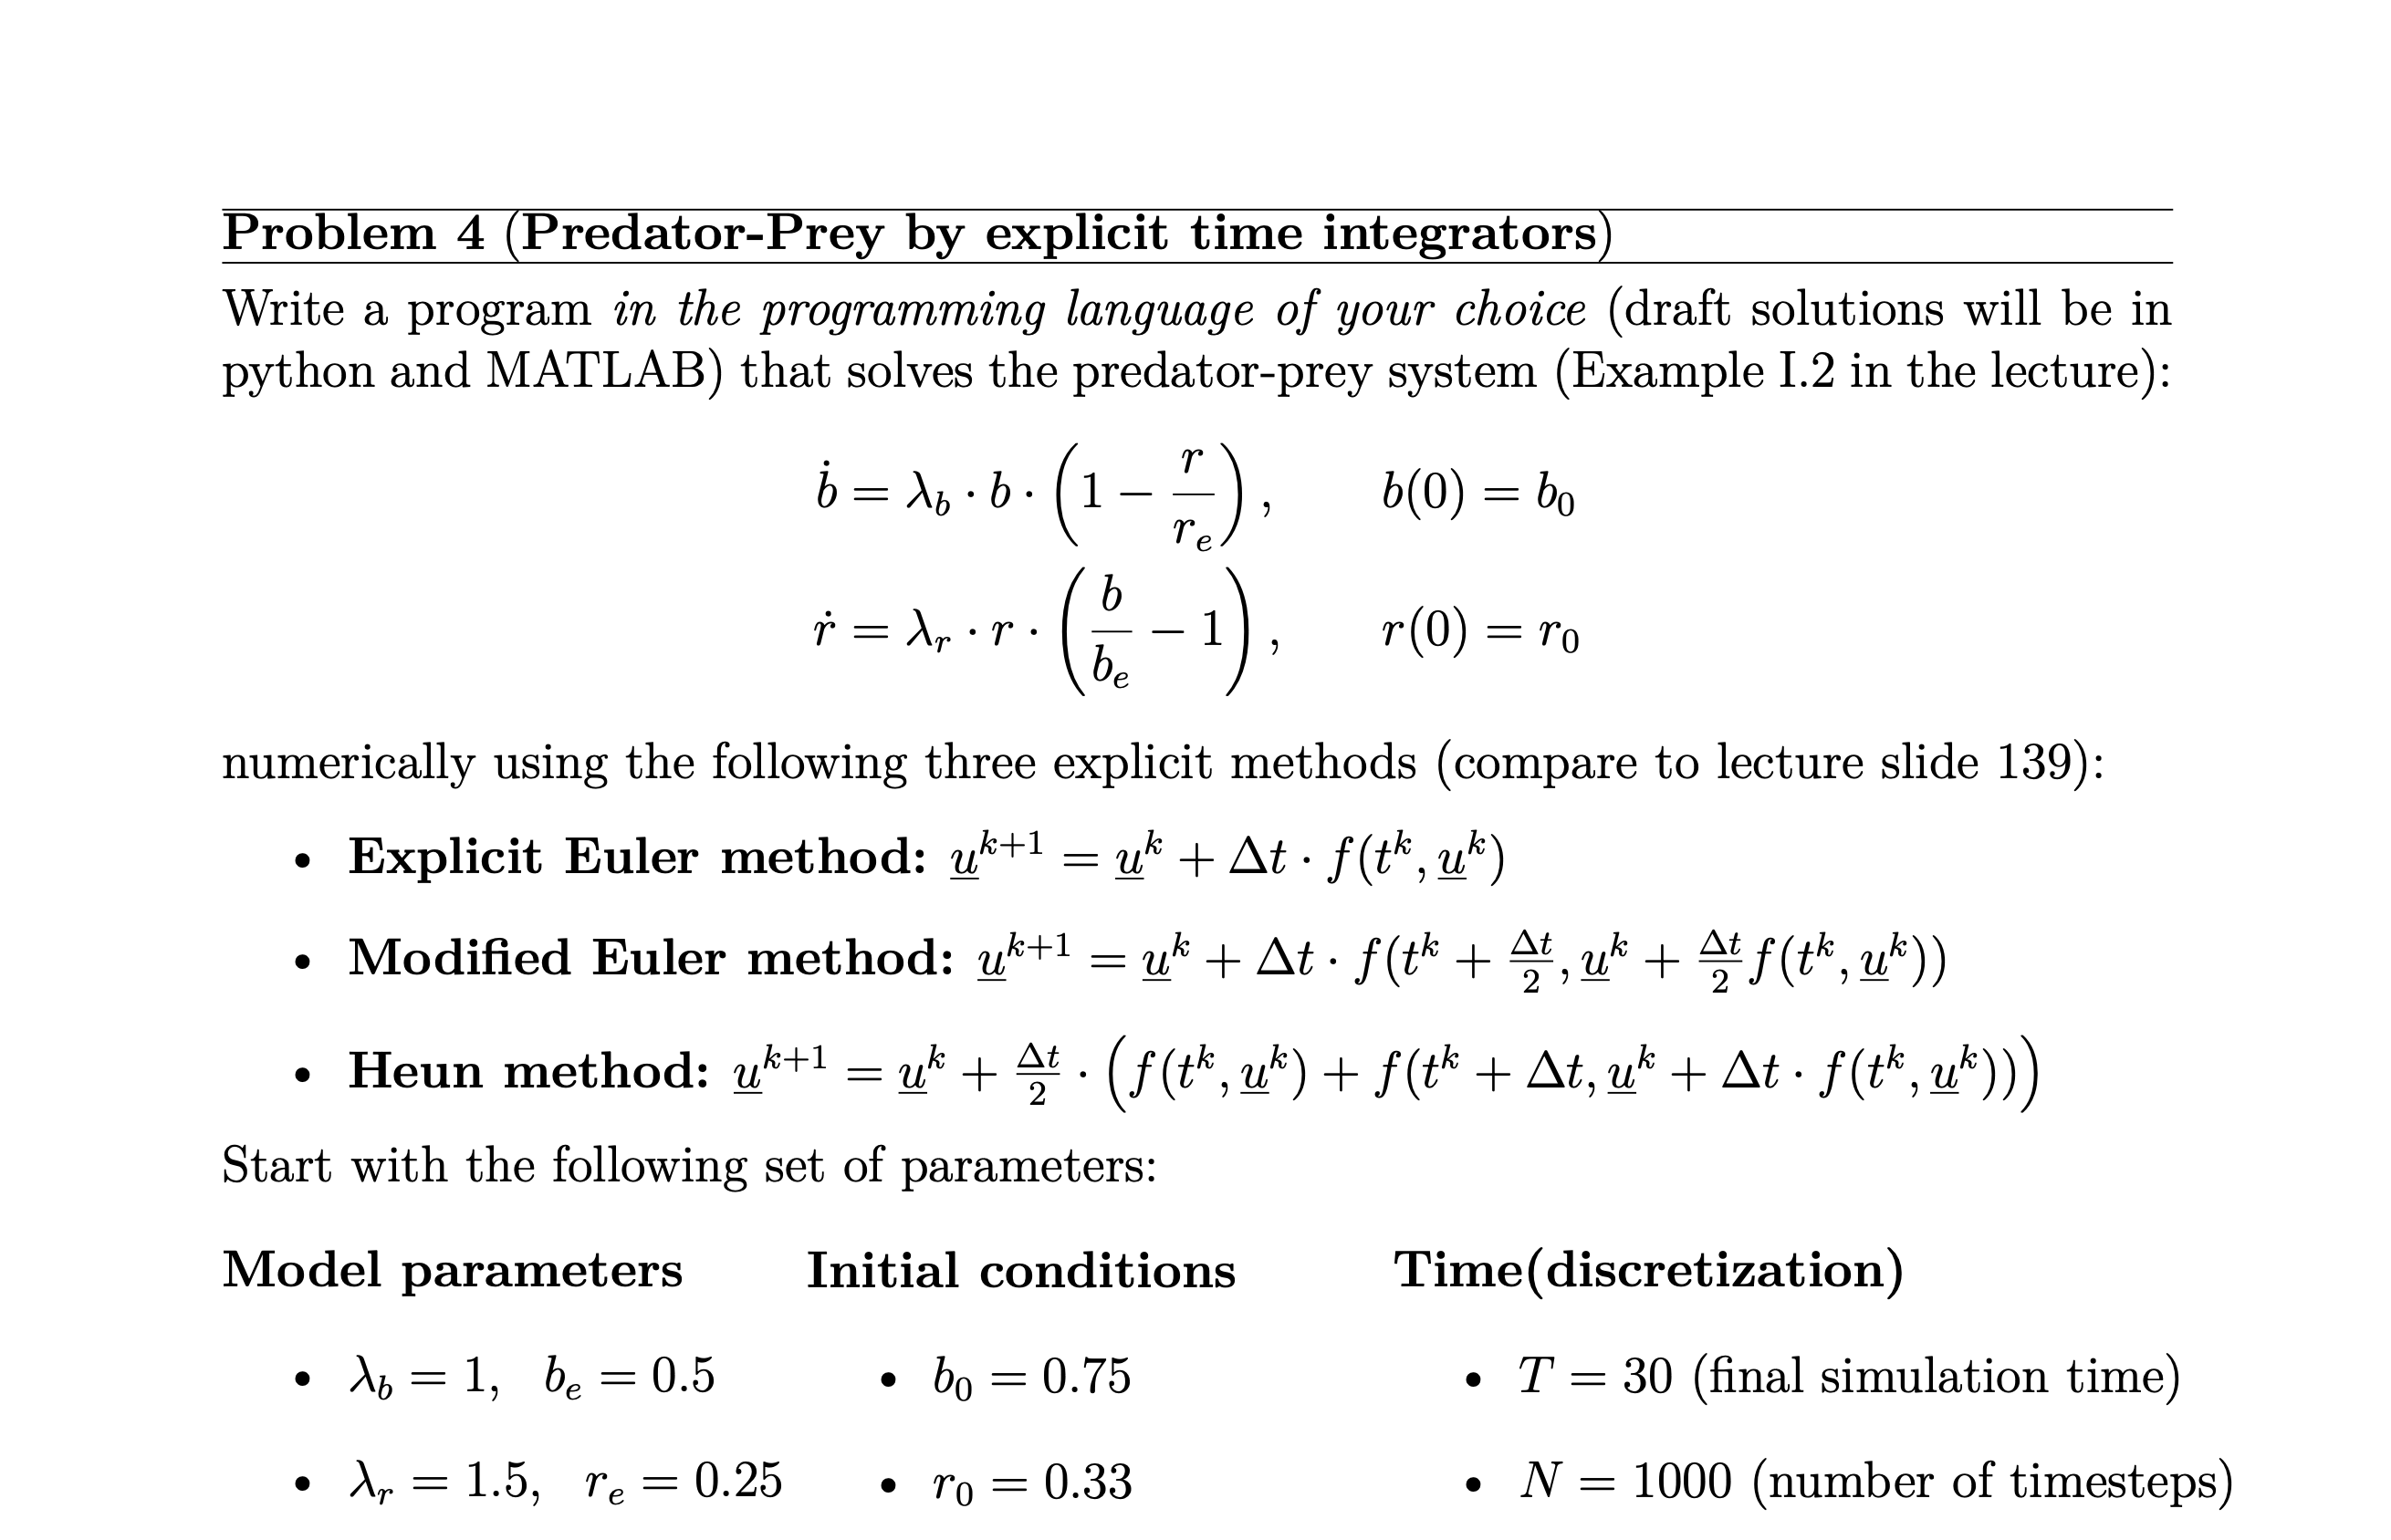

In [17]:
Image.open('Question.png')



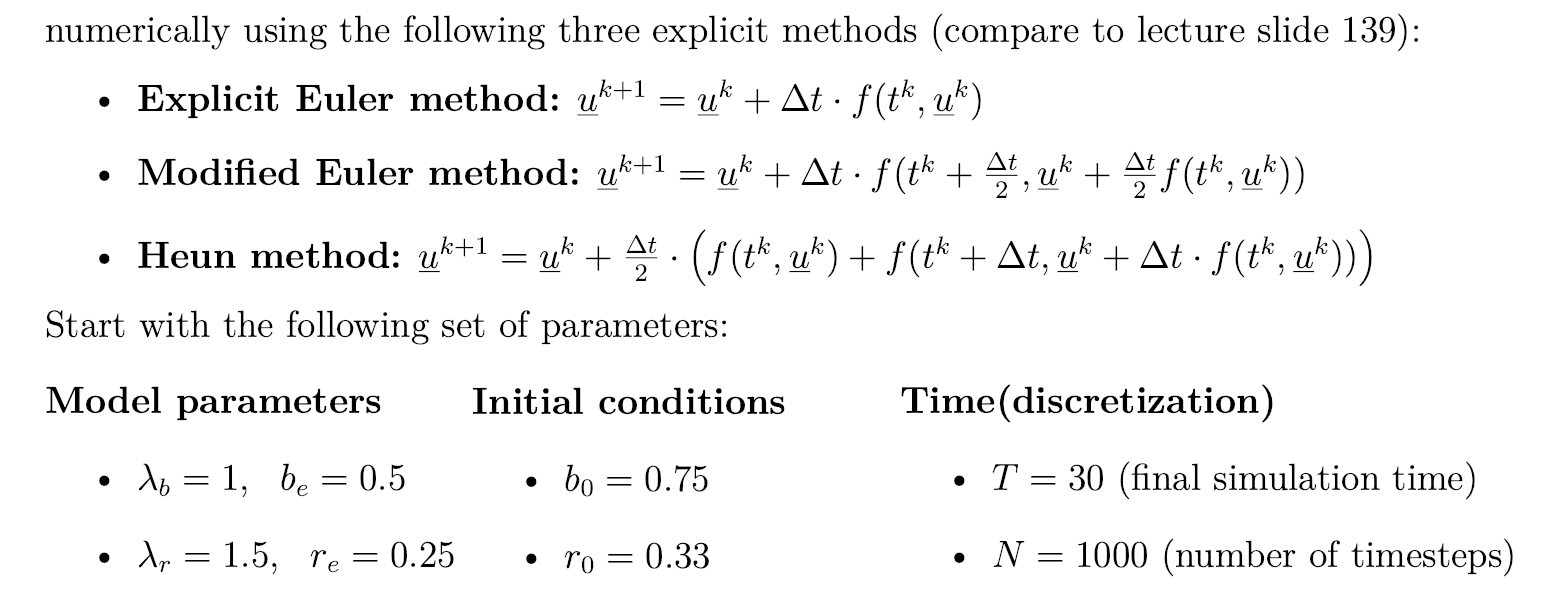

In [19]:
## All the given methods which we need to impolement.
Image.open('Methods.png')

#### Defining all the parameters and constants, initial values

In [94]:
b_initial = 0.75 # initial condition
r_initial = 0.33 # initial condition

# parameters
lambda_b = 1
lambda_r = 1.5
b_e  = 0.5
r_e = 0.25

Totaltime = 30
Total_steps = 1000
step_size = float(Totaltime/Total_steps)
step_size

0.03

### One step Euler's expicit scheme.

In [102]:
# Initializing the b(pray) and r(predetor) and time step values.
b = [b_initial] 
r = [r_initial]
t = [0]

while t[-1] < Totaltime:
    b_next = b[-1] + ( step_size * diff_b(b[-1], r[-1], lambda_b, r_e) )
    b.append(b_next)

    r_next = r[-1] + ( step_size * diff_r(b[-1], r[-1], lambda_r, b_e))
    r.append(r_next)

    t_next = t[-1]+ step_size
    t.append(t_next)



### Modified_Euler's Method.

- In this method the theory is we know slope at starting point then now we can go to one or half step ahead and calculate the y values 

- Once we have them we can calculate the slope at that ahead half step point. 

- Once we have slope after half time step then we go to full time step ahead with this slope. 

- With the formula u[-1] + dt * slope at half time step

In [ ]:
b_modi_Euler = [b_initial] # update according to new modified Euler's method
r_modi_Euler = [r_initial] # Update according to new modified Euler's method
t = [0]
# b,r,lambda_b:int, b_e:int,r_e:int,lambda_r :int, step_size:float

# Defining the modified Euler's method 



while t[-1] < Totaltime:

    # below is the y values after half time steps Now we will calculate the slope in these values.
    b_step = (b_modi_Euler[-1] + (step_size * 0.5* diff_b(b_modi_Euler[-1], r_modi_Euler[-1], lambda_b, r_e) ))
    r_step = (r_modi_Euler[-1] + ( step_size * 0.5* diff_r(b_modi_Euler[-1], r_modi_Euler[-1], lambda_r, b_e)))

    b_next = b_modi_Euler[-1] + step_size * diff_b(b_step, r_step, lambda_b, r_e) # Here this diff_b calculates the slope in updated y values.
    r_next = r_modi_Euler[-1] + step_size * diff_r(b_step, r_step, lambda_r,  b_e) # same as above 
    
    b_modi_Euler.append(b_next)

    
    r_modi_Euler.append(r_next)

    t_next = t[-1]+ step_size
    t.append(t_next)


#### Heun's Methode -:

In [104]:
# Initializing the b(pray) and r(predetor) and time step values.
b_Heuns = [b_initial] 
r_Heuns = [r_initial]
t = [0]

while t[-1] < Totaltime:
    b_step= b_Heuns[-1] + step_size* diff_b(b_Heuns[-1], r_Heuns[-1], lambda_b, r_e)
    
    r_step = r_Heuns[-1] + step_size* diff_r(b_Heuns[-1], r_Heuns[-1], lambda_r, b_e)

    b_next = b_Heuns[-1] + step_size*(diff_b(b_Heuns[-1], r_Heuns[-1], lambda_b, r_e)+ diff_b(b_step, r_step, lambda_b, r_e))*0.5
    r_next = r_Heuns[-1] + step_size* ( diff_r(b_Heuns[-1], r_Heuns[-1], lambda_r, b_e) + diff_r(b_step, r_step, lambda_r, r_e))*0.5

    b_Heuns.append(b_next) 
    r_Heuns.append(r_next)

    t_next = t[-1]+ step_size
    t.append(t_next)

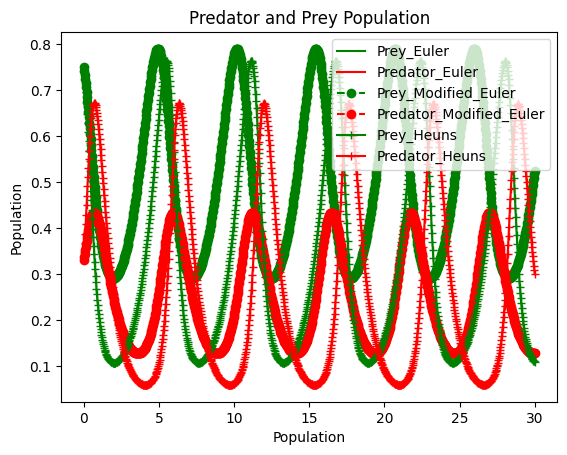

In [116]:
plt.title("Predator and Prey Population")
plt.xlabel('Population')
plt.ylabel("Population")
plt.plot(t,b,"g", label = "Prey_Euler" )
plt.plot(t, r, "r", label = "Predator_Euler")
plt.plot(t,b_modi_Euler, "g",  linestyle ="--", label ="Prey_Modified_Euler", marker ="o")
plt.plot(t,r_modi_Euler,"r", linestyle ="--", label ="Predator_Modified_Euler", marker = "o")
plt.plot(t, b_Heuns,"g", label = "Prey_Heuns" , marker = "+")
plt.plot(t, r_Heuns, "r", label = "Predator_Heuns", marker = "+")
plt.legend()
plt.show()

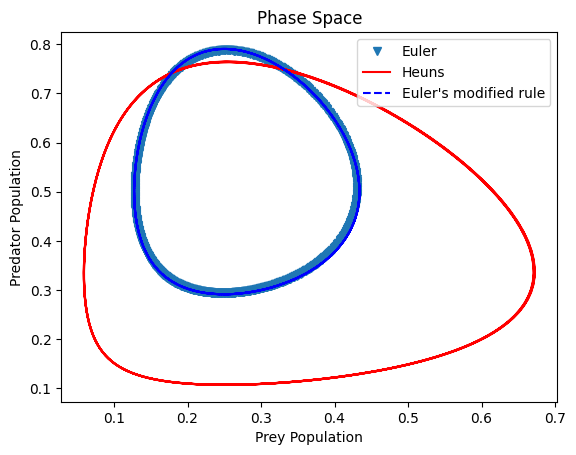

In [117]:
plt.title("Phase Space")
plt.xlabel('Prey Population')
plt.ylabel("Predator Population")
plt.plot(r, b, "v" , label ="Euler")
plt.plot(r_Heuns, b_Heuns ,"r",label="Heuns")
plt.plot(r_modi_Euler, b_modi_Euler, "b",label ="Euler's modified rule", linestyle = "--")
plt.legend()